# TP3 - Parte 1: Visualizaciones

Realizar 6 visualizaciones interesantes que ayuden a explicar el target.

## Imports y carga de datos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [5]:
trainDf = pd.read_csv("../train.csv", index_col=0)

In [6]:
testDf = pd.read_csv("../test.csv", index_col=0)

In [7]:
sample_submissionDf = pd.read_csv("../sample_submission.csv", index_col=0)

In [8]:
trainDf.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
testDf.head()

,keyword,location,text
id,,,
0,NaN,NaN,Just happened a terrible car crash
2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
sample_submissionDf.head()

,target
id,
0,0
2,0
3,0
9,0
11,0


## Exploración de Datos

In [11]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


In [12]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3263 entries, 0 to 10875
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   3237 non-null   object
 1   location  2158 non-null   object
 2   text      3263 non-null   object
dtypes: object(3)
memory usage: 102.0+ KB


Podemos ver que tenemos 7613 entradas en nuestro set de train y 3263 entradas que predecir en nuestro set de test.

Para el análisis exploratorio, solo vamos a utilizar el set de train, ya que no tiene mucho sentido buscar visualizaciónes que expliquen el target para entradas de las cuales no conocemos el target (además, no tiene sentido que nosotros podamos visualizar las entradas que recibirá nuestro modelo sobre las que deberá predecir el target).

De nuestro set de entreno, podemos ver que nuestros features son: keyword, location y text. Sabemos que el 100% de los tweets tendran text, pero no todos tienen keyword o location, asique me parece interesante ver qué proporcion de entradas tendrá valores para dichos features:

In [13]:
counts = trainDf.count()

print("Proporcion de entradas con 'keyword' no nula:", counts['keyword']/counts['target'])
print("Proporcion de entradas con 'location' no nula:", counts['location']/counts['target'])


Proporcion de entradas con 'keyword' no nula: 0.9919873899908052
Proporcion de entradas con 'location' no nula: 0.6672796532247471


Tiene sentido entonces, comenzar por realizar visualizaciones/análisis sobre la keyword, luego analizaremos la location y por último el texto (ya que el mismo es el que requiere un mayor procesado).

### Keyword

In [14]:
trainDf['keyword'].nunique()

221

In [15]:
trainDf['keyword'].str.upper().nunique()

221

Para comenzar, 221 palabras clave únicas son muy dificiles de plotear de forma clara, por lo que voy a empezar realizando un WordCloud para visualizar las palabras más comunes y menos comunes, y mi idea es luego realizar un stacked bar plot para ver si hay keywords que influyan o no en la probabilidad de que el tweet hable de un desastre natural o no:

In [16]:
trainDf['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [17]:
freqs = trainDf['keyword'].value_counts().to_dict()

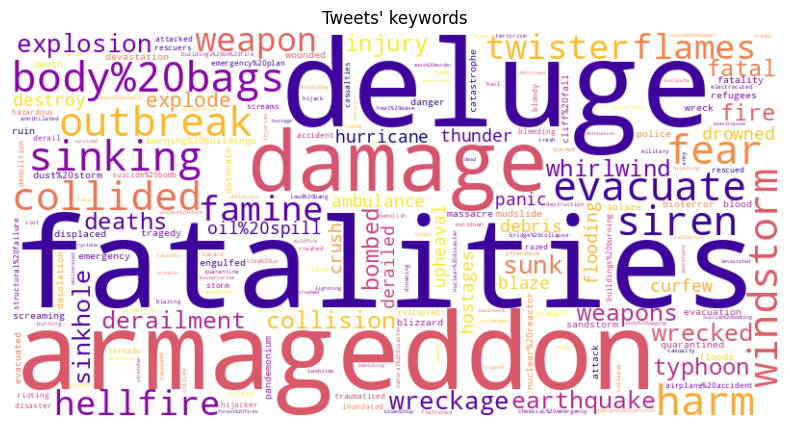

In [23]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',  # podés usar 'viridis', 'inferno', etc.
    random_state=42
).generate_from_frequencies(freqs)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Tweets' keywords")

plt.show()

Esta visualización nos permite darnos una idea de las keywords, lo que nos deja ver que las mismas en su mayoría son palabras que al menos tienen una interpretación relacionada con alguna catástrofe o accidente. (Quiero decir, no son palabras aleatorias como "algodón", "reloj", etc.)

Aún así, no es una visualización que nos permita entender el target todavía, por lo que vamos a pasar a nuestro stacked bar plot:

In [24]:
trainDf[['keyword','target']]

,keyword,target
id,,
1,NaN,1
4,NaN,1
5,NaN,1
6,NaN,1
7,NaN,1
...,...,...
10869,NaN,1
10870,NaN,1
10871,NaN,1


Primero, queremos tener la cantidad de apariciones de cada keyword con cada target, por ahora vamos a incluir los nulos ya que puede ser que la ausencia de keyword nos indique algo:

In [25]:
keywords = trainDf[['keyword','target']].groupby('keyword').agg({'target':['count','sum']})
keywords.columns = ['Total Entries','Positive Targets']

keywords

,Total Entries,Positive Targets
keyword,,
ablaze,36,13
accident,35,24
aftershock,34,0
airplane%20accident,35,30
ambulance,38,20
...,...,...
wounded,37,26
wounds,33,10
wreck,37,7


In [26]:
keywords['Negative Targets'] = keywords['Total Entries'] - keywords['Positive Targets']

Con el count tenemos la cantidad de apariciones de cada palabra, y con el sum la cantidad de filas con target = 1.

In [27]:
keywords.describe()

,Total Entries,Positive Targets,Negative Targets
count,221.000000,221.000000,221.000000
mean,34.171946,14.610860,19.561086
std,4.786091,9.696891,9.699209
min,9.000000,0.000000,0.000000
25%,33.000000,6.000000,12.000000
50%,35.000000,13.000000,20.000000
75%,37.000000,22.000000,28.000000
max,45.000000,39.000000,40.000000


In [28]:
221/4

55.25

Dada la distribución, para la visualización vamos a tomar las keywords que aparezcan al menos 40 veces para mostrarlas. También vamos a mostrar aquellas que aparezcan menos de 30 veces.

In [29]:
keywords[keywords['Total Entries'] > 39]

,Total Entries,Positive Targets,Negative Targets
keyword,,,
armageddon,42,5,37
body%20bags,41,1,40
collided,40,23,17
damage,41,19,22
deluge,42,6,36
evacuate,40,25,15
fatalities,45,26,19
fear,40,5,35
harm,41,4,37


In [30]:
most_common_keywords = keywords[keywords['Total Entries'] > 39]
least_common_keywords = keywords[keywords['Total Entries'] < 30]

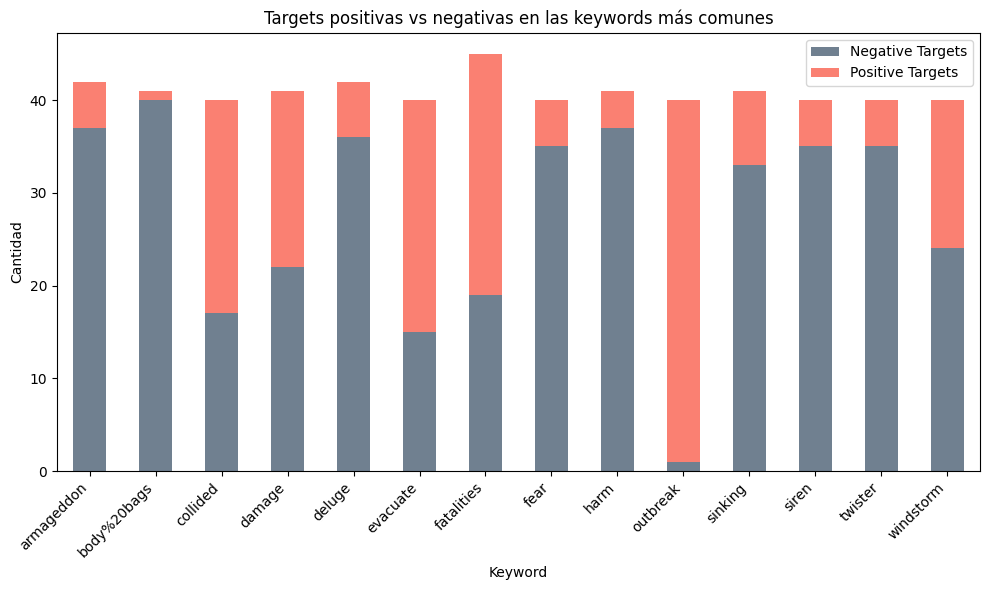

In [35]:
most_common_keywords[['Negative Targets','Positive Targets']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['slategrey','salmon']
)

plt.title("Targets positivas vs negativas en las keywords más comunes")
plt.xlabel("Keyword")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- OBSERVACIÓN: Se decidió utilizar color rojo para los targets **positivos** por el hecho de que los mismos representan que el tweet efectivamente hable de una catástrofe natural, por lo que se relaciona el color rojo con la situación catastrófica. El mismo podría cambiarse por otro color para evitar confusión y se hará en los gráficos normalizados más adelante.

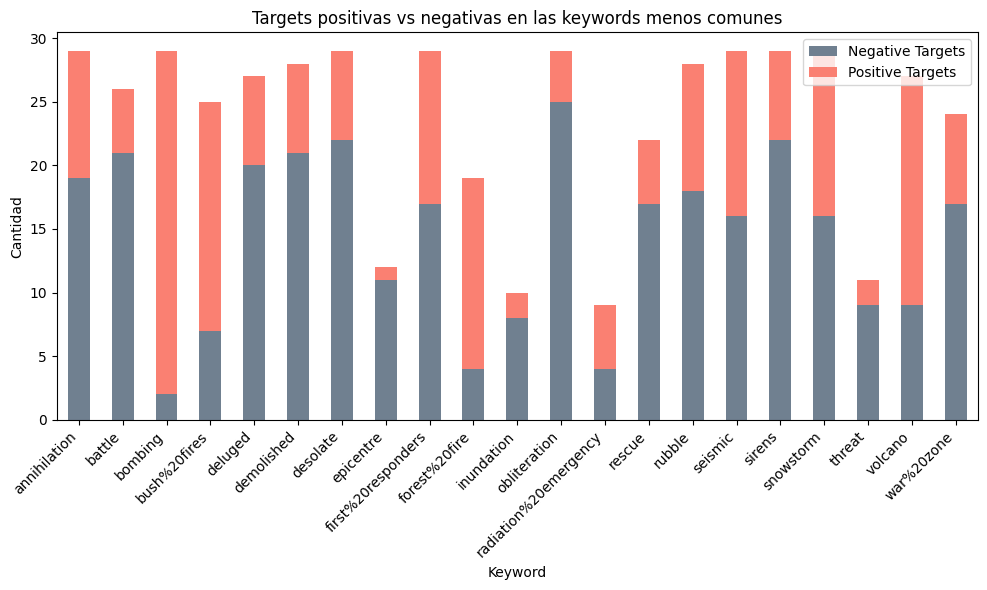

In [ ]:
least_common_keywords[['Negative Targets','Positive Targets']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['slategrey','salmon']
)

plt.title("Targets positivas vs negativas en las keywords menos comunes")
plt.xlabel("Keyword")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Estas visualizaciones nos permiten concluir dos cosas:
- Como las proporciones de target positivo vs negativo en las keywords varían sin importar la frecuencia de las mismas, este no parece ser un feature relevante para predecir el target (qué tan común sea o no una palabra)
- Las keywords sí tienen influencia en el target, ya que podemos ver que hay algunas como *epicentre* o *harm* que muy pocas veces tienen target positivo, y otras como *bombing* o *outbreak* que se comportan de forma opuesta.

Como extra, podemos generar las visualizaciones normalizadas y ordenadas por ratio, para representar mejor las proporciones de targets positivos vs negativos:

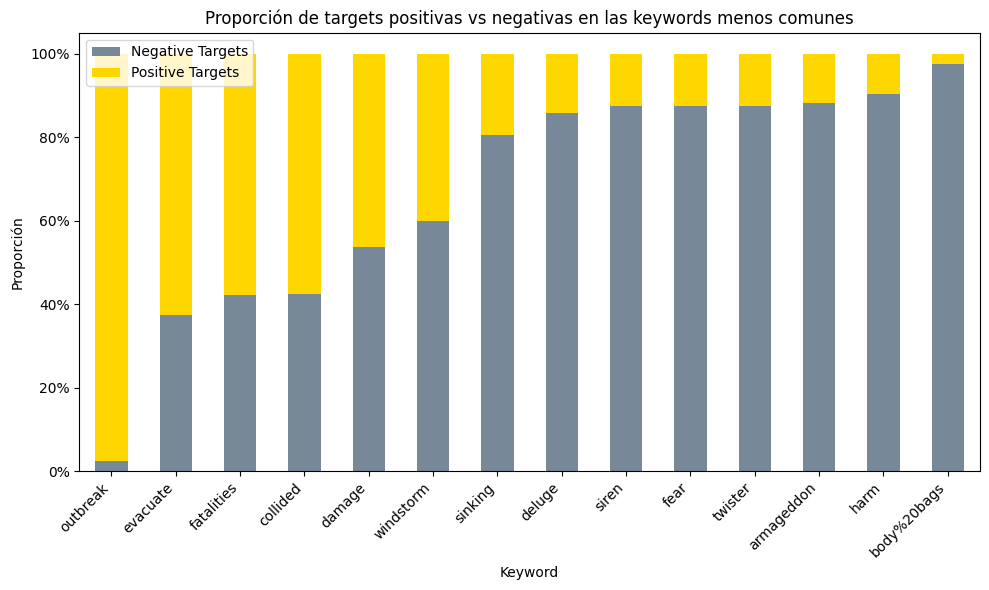

In [36]:
common_keywords_and_pct = most_common_keywords.copy()
common_keywords_and_pct['pct_positive'] = common_keywords_and_pct['Positive Targets'] / (common_keywords_and_pct['Positive Targets'] + common_keywords_and_pct['Negative Targets'])
common_keywords_and_pct = common_keywords_and_pct.sort_values('pct_positive', ascending=False)

most_proportion_df = common_keywords_and_pct[['Negative Targets','Positive Targets']].div(
    common_keywords_and_pct[['Negative Targets','Positive Targets']].sum(axis=1),
    axis=0
)

most_proportion_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['lightslategrey','gold']
)

plt.title("Proporción de targets positivas vs negativas en las keywords menos comunes")
plt.xlabel("Keyword")
plt.ylabel("Proporción")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

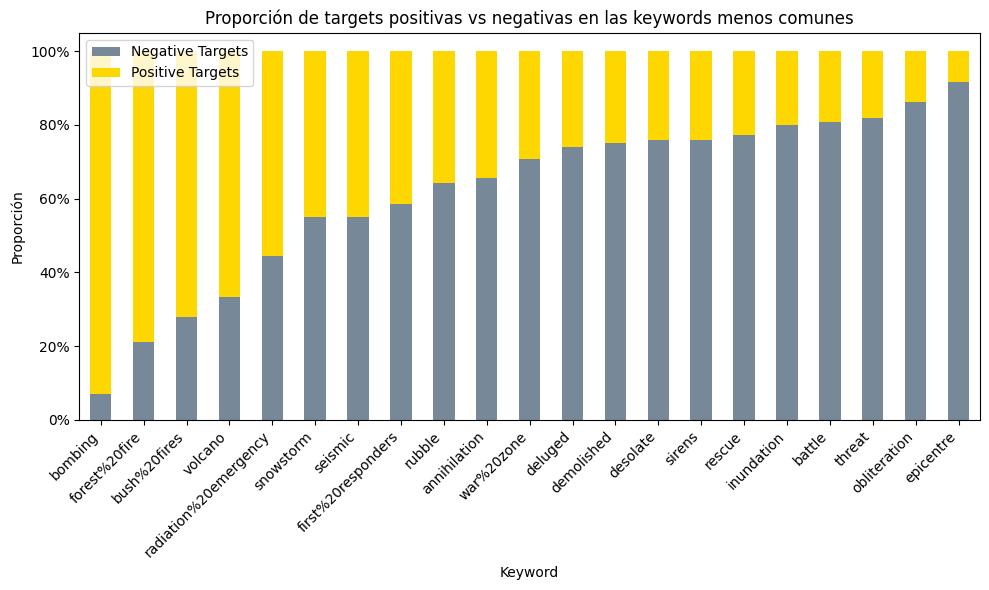

In [37]:
uncommon_keywords_and_pct = least_common_keywords.copy()
uncommon_keywords_and_pct['pct_positive'] = uncommon_keywords_and_pct['Positive Targets'] / (uncommon_keywords_and_pct['Positive Targets'] + uncommon_keywords_and_pct['Negative Targets'])
uncommon_keywords_and_pct = uncommon_keywords_and_pct.sort_values('pct_positive', ascending=False)

proportion_df = uncommon_keywords_and_pct[['Negative Targets','Positive Targets']].div(
    uncommon_keywords_and_pct[['Negative Targets','Positive Targets']].sum(axis=1),
    axis=0
)

proportion_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['lightslategrey','gold']
)

plt.title("Proporción de targets positivas vs negativas en las keywords menos comunes")
plt.xlabel("Keyword")
plt.ylabel("Proporción")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

### Location

Para la location, vamos a querer estandarizar las mismas en base a sus frecuencias o sacar algo de información de ellas en los modelos más avanzados.
Por lo tanto por ahora simplemente voy a transformar todas las ubicaciones a lowercase y stripearlas para hacer una especie de primera normalización.

In [38]:
trainDf['location'].nunique()

3341

In [39]:
trainDf['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'],
      shape=(3342,), dtype=object)

In [40]:
trainDf['location'] = (
    trainDf['location'].str.strip().str.lower().str.replace(r'[^\w\s,]', '', regex=True)
)

### Text

#### Análisis Inicial:

Para analizar el texto del tweet, tenemos que sacar algunas features para analizar y visualizar si hay alguna relación con el target. Podemos empezar con:

**Features Numéricas**
- Cantidad de palabras
- Cantidad de caracteres
- **Cantidad de letras en mayuscula**
- **Cantidad de palabras en mayuscula**
- **Cantidad de caracteres especiales (no alfanumericos)**
- **Cantidad de caracteres numéricos**

**Features Categóricas**
- **Presencia o no de Hashtags (#)**
- **Presencia o no de URLs o links**
- **Presencia o no de hashtags más comunes o conocidos?**
- **Presencia o no de los @ más comunes o conocidos?**
- **Presencia de palabras clave (de acción: evacuate, rescue, damage, etc.) (de emoción: pray, help, fear, etc.)**
- No hay emojis asique no puedo usar eso.


Se me ocurre entonces comenzar con una primera visualización que sea un histograma de la cantidad de palabras por target, lo que nos puede mostrar si hay alguna diferencia en la distribución/tendencia de los largos de los tweets.

In [41]:
trainDf['tweet_length'] = trainDf['text'].map(lambda x: len(x))
trainDf['words_count'] = trainDf['text'].map(lambda x: len(x.split()))
trainDf

,keyword,location,text,target,tweet_length,words_count
id,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
...,...,...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8


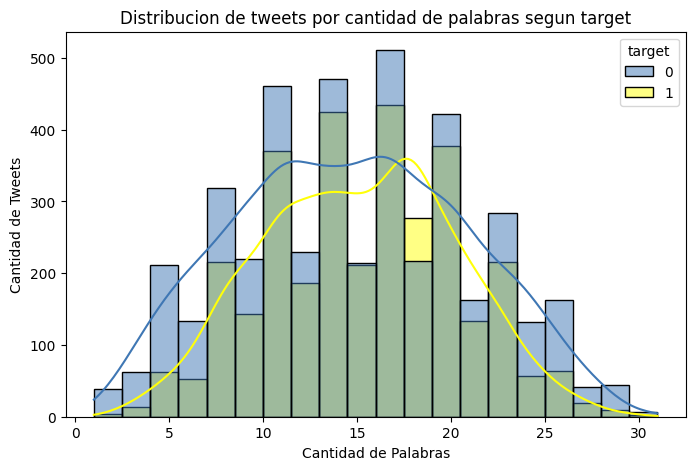

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(data=trainDf, x="words_count", hue="target", bins=20, kde=True, palette=["#3f77b4", "#ffff0a"])
plt.title("Distribucion de tweets por cantidad de palabras segun target")
plt.xlabel("Cantidad de Palabras")
plt.ylabel("Cantidad de Tweets")
plt.show()

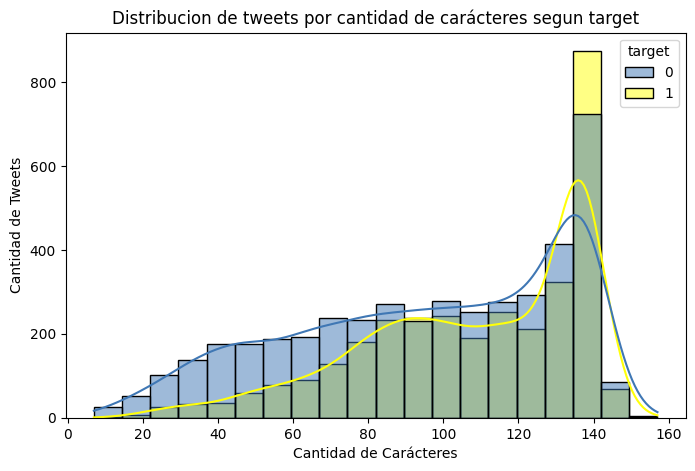

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(data=trainDf, x="tweet_length", hue="target", bins=20, kde=True, palette=["#3f77b4", "#ffff0a"])
plt.title("Distribucion de tweets por cantidad de carácteres segun target")
plt.xlabel("Cantidad de Carácteres")
plt.ylabel("Cantidad de Tweets")
plt.show()

Se puede ver que la distribución tanto para largo del tweet como cantidad de palabras es similar para ambos tipos de tweets, por lo que no nos servirán para predecir el target.

#### Feature Engineering:

Surge entonces obviamente la idea de realizar un feature engineering más interesante, generando features que sí sirvan para predecir el target. Por lo tanto, resulta conveniente primero ocuparnos de generar los features y luego analizar los mismos con visualizaciones.

Para esto, vamos a crear algunas de las features que nombré previamente, y luego cuando implemente los modelos si necesito o surgen más features interesantes, las extraeremos en ese momento.

También, algunas features tienen un problema similar al de las ubicaciones más comunes, y estas podremos procesarlas unicamente luego de separar el set de datos en *train* y *validation* para evitar filtrar el target. Por ejemplo: los hashtags o usuarios etiquetados más comunes o la presencia de algunas palabras clave que podríamos quere definir más adelante.


##### Features Numéricos

Vamos a generar:
- **Cantidad de letras en mayuscula**
- **Cantidad de palabras en mayuscula**
- **Cantidad de caracteres especiales (no alfanumericos)**
- **Cantidad de caracteres numéricos**

In [44]:
trainDf['num_uppercase_letters'] = trainDf['text'].str.count(r'[A-Z]')

In [45]:
trainDf['num_uppercase_words'] = trainDf['text'].str.findall(r'\b[A-Z]{2,}\b').map(len)

In [46]:
trainDf['num_special_chars'] = trainDf['text'].str.count(r'[^a-zA-Z0-9\s]')

In [47]:
trainDf['num_digits'] = trainDf['text'].str.count(r'\d')

In [48]:
trainDf.head()

,keyword,location,text,target,tweet_length,words_count,num_uppercase_letters,num_uppercase_words,num_special_chars,num_digits
id,,,,,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,10,1,1,0
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,5,0,1,0
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,2,0,3,0
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,1,0,2,5
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,3,0,2,0


##### Features Categoricos

Vamos a generar:
- **Presencia o no de Hashtags (#)**
- **Presencia o no de URLs o links**
- **Presencia o no de Etiquetados (@)**
- **Idioma del tweet**


In [49]:
trainDf['has_hashtag'] = trainDf['text'].str.contains(r'#\w+', regex=True, na=False).astype(int)

In [50]:
trainDf['has_url'] = trainDf['text'].str.contains(r'http[s]?://|www\.', regex=True, na=False).astype(int)

In [51]:
trainDf['has_tag'] = trainDf['text'].str.contains(r'@\w+', regex=True, na=False).astype(int)

Para obtener el idioma de cada tweet, usaremos langdetect. Vamos a aplicarlo unicamente para los tweets con al menos 10 caracteres para prevenir fallas, y luego vamos a observar los resultados obtenidos para ver si realmente hay tweets en otros idiomas o si todos/casi todos son en inglés y por lo tanto no vale la pena la diferenciación:

In [52]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # reproducible

def safe_detect(x):
    try:
        if isinstance(x, str) and len(x) > 10:
            return detect(x)
        else:
            return 'unknown'
    except:
        return 'unknown'


trainDf['languague'] = trainDf['text'].map(safe_detect)

In [ ]:
trainDf.head()

,keyword,location,text,target,tweet_length,words_count,num_uppercase_letters,num_uppercase_words,num_special_chars,num_digits,has_hashtag,has_url,has_tag,languague
id,,,,,,,,,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,10,1,1,0,1,0,0,en
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,5,0,1,0,0,0,0,en
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,2,0,3,0,0,0,0,en
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,1,0,2,5,1,0,0,en
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,3,0,2,0,1,0,0,en


In [ ]:
trainDf[['languague']].nunique()

,0
languague,28


In [ ]:
trainDf[['languague']].value_counts()

,count
languague,
en,7305
de,56
ca,25
it,21
da,20
af,19
no,19
sv,19
fr,16


A priori, obtenemos 28 idiomas distintos y varios de ellos con al menos 5 tweets en el mismo. Por lo que pareciera haber funcionado.

Pero si vemos los textos de los tweets de algunos idiomas:

In [ ]:
trainDf[trainDf['languague'] == 'es'][['text','target']]

,text,target
id,,
1267,@Lobo_paranoico Mad Men,0
4021,#Metepec #Mexico - ?NIGHT DISASTER?...E(Oficia...,1
4724,Cascada - Evacuate The Dancefloor (Official Vi...,0
5103,Robert Conquest Famine Museum Kiev @GuidoFawke...,0
8504,@camilacabello97 NOW IM INTERNALLY SCREAMING,0
9704,I feel like a tornado http://t.co/iZJK6kpWiZ,1


In [ ]:
print('\n'.join(trainDf[trainDf['languague'] == 'es']['text']))

@Lobo_paranoico Mad Men
#Metepec #Mexico - ?NIGHT DISASTER?...E(Oficial) @ #NitClub #mÌ¼sica #mÌ¼sica http://t.co/WTfJF9jjzs
Cascada - Evacuate The Dancefloor (Official Video) https://t.co/OHCx3y8l4s via @YouTube
Robert Conquest Famine Museum Kiev @GuidoFawkes @MediaGuido https://t.co/WE40iUX7Ib
@camilacabello97 NOW IM INTERNALLY SCREAMING
I feel like a tornado http://t.co/iZJK6kpWiZ


In [ ]:
trainDf[trainDf['languague'] == 'fr'][['text','target']]

,text,target
id,,
24,I love fruits,0
958,@Beautiful_Juic1 just letting you know,0
2350,Greece's tax revenues collapse as debt crisis ...,1
2576,cPanel Crash Course http://t.co/bIRKbje23e #co...,0
3380,@Demolition_d best grill u fkn pleb,0
3787,Self destruction mode! ???? https://t.co/ZtYZh...,0
4372,ML 2.0 SICILY ITALY http://t.co/z6hxx6d2pm #eu...,0
4410,Electrocute yourself,0
4895,@allen_enbot If you mess up it's gonna explode...,1


In [ ]:
trainDf[trainDf['languague'] == 'it'].head()[['text','target']]

,text,target
id,,
748,I liked a @YouTube video http://t.co/TNXQuOr1w...,0
798,Dragon Ball Z: Battle Of Gods (2014) - Rotten ...,0
1183,@Blizzard_draco GIVE ME FREE ART KAMON,0
1198,@Blizzard_Gamin ight,0
1208,Lizard Wizard in a Blizzard #LWB http://t.co/M...,0


In [ ]:
pd.set_option('display.max_colwidth', None)

trainDf[trainDf['languague'] == 'de'].head(8)[['text','target']]

,text,target
id,,
89,Rene Ablaze &amp; Jacinta - Secret 2k13 (Fallen Skies Edit) - Mar 30 2013 https://t.co/7MLMsUzV1Z,0
128,FYI CAD:FYI: ;ACCIDENT PROPERTY DAMAGE;NHS;999 PINER RD/HORNDALE DR,1
131,;ACCIDENT PROPERTY DAMAGE; PINER RD/HORNDALE DR,1
133,FYI CAD:FYI: ;ACCIDENT PROPERTY DAMAGE;WPD;1600 S 17TH ST,1
281,HAPPENING NOW - HATZOLAH EMS AMBULANCE RESPONDING WITH DUAL SIRENS ANDÛ_ https://t.co/SeK6MQ6NJF,0
340,ANNIHILATED IN DAMASCUS: SYRIAN ARMY GRINDS Û÷ALLOOSH AND HIS GANG INTO THE MANURE PILE\nhttp://t.co/7rakhP3bWm,1
389,THANKS!!!!! @COUNT DANTE. :) DO JOIN US BY FOLLOWING THE @ANNIHILATION ZONE. JOHNNY.,0
519,VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK,1


In [ ]:
pd.reset_option('display.max_colwidth')

Podemos ver que en ninguno de los casos pareciera ser que el lenguaje no sea inglés o mezcla de lenguajes lo que confunde al detector. Por lo que vamos a descartar esta feature.

#### Features finales:

In [ ]:
trainDf.head(5)

,keyword,location,text,target,tweet_length,words_count,num_uppercase_letters,num_uppercase_words,num_special_chars,num_digits,has_hashtag,has_url,has_tag,languague
id,,,,,,,,,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,10,1,1,0,1,0,0,en
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,5,0,1,0,0,0,0,en
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,2,0,3,0,0,0,0,en
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,1,0,2,5,1,0,0,en
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,3,0,2,0,1,0,0,en


In [ ]:
trainDf = trainDf.drop(['languague'], axis=1)

### Visualizaciones avanzadas:

#### Heatmap de Correlación

Nos va a permitir ver si hay correlación entre las variables numéricas y el target que no hayamos visto.

También nos permitirá ver si las features están correlacionadas entre sí y detectar redundancia.

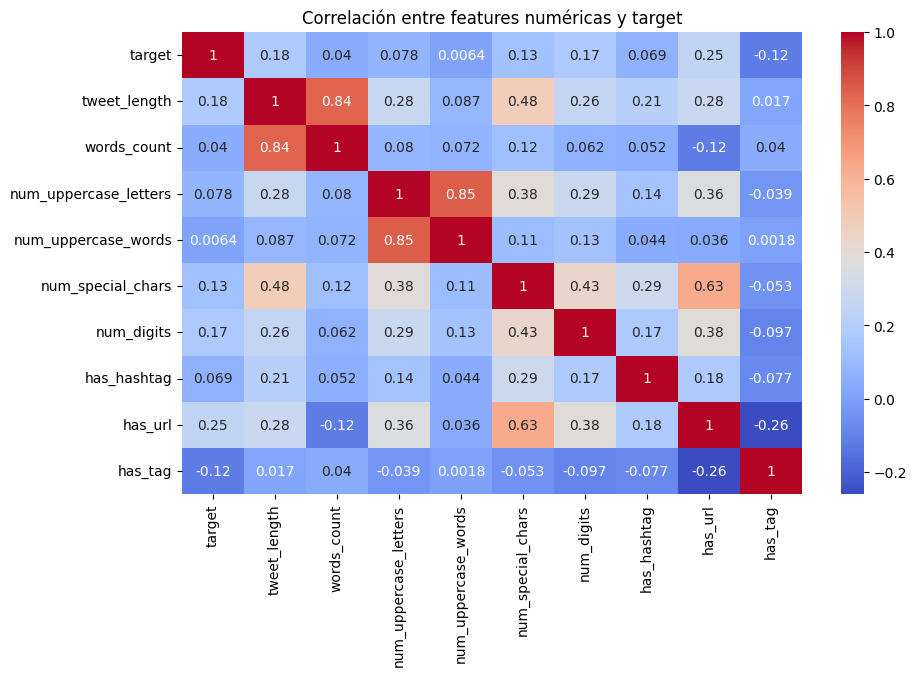

In [53]:
numeric_cols = trainDf.select_dtypes(include=['int64','float64'])
corr = numeric_cols.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlación entre features numéricas y target")
plt.show()

#### Scatterplot

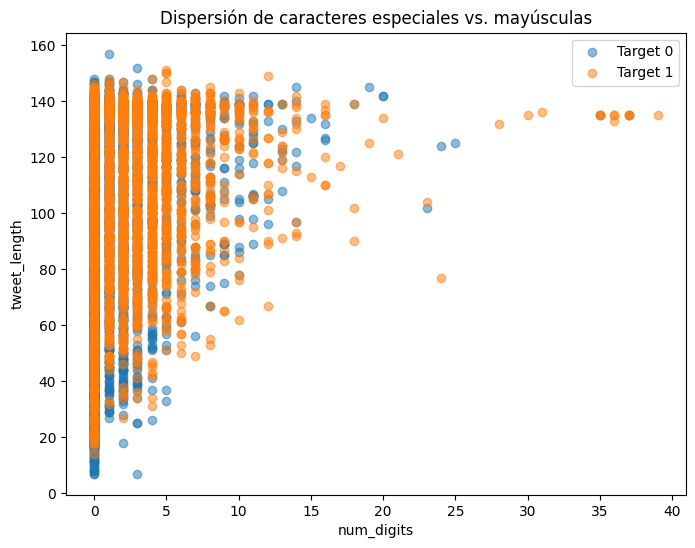

In [58]:
plt.figure(figsize=(8,6))

# Clase 0
plt.scatter(
    trainDf[trainDf['target']==0]['num_digits'],
    trainDf[trainDf['target']==0]['tweet_length'],
    alpha=0.5,
    label="Target 0"
)

# Clase 1
plt.scatter(
    trainDf[trainDf['target']==1]['num_digits'],
    trainDf[trainDf['target']==1]['tweet_length'],
    alpha=0.5,
    label="Target 1"
)

plt.xlabel("num_digits")
plt.ylabel("tweet_length")
plt.title("Dispersión de caracteres especiales vs. mayúsculas")
plt.legend()
plt.show()

#### Boxplot

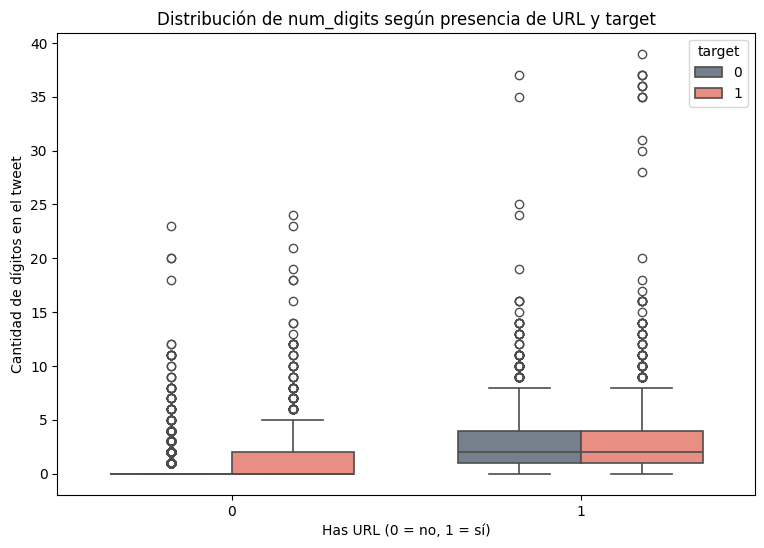

In [59]:
plt.figure(figsize=(9,6))
sns.boxplot(
    x='has_url',
    y='num_digits',
    data=trainDf,
    hue='target',
    palette={0:'slategrey', 1:'salmon'},
    width=0.7,
    linewidth=1.2
)

plt.title("Distribución de num_digits según presencia de URL y target")
plt.xlabel("Has URL (0 = no, 1 = sí)")
plt.ylabel("Cantidad de dígitos en el tweet")
plt.show()

#### Locations

Queremos ver si las ubicaciones pueden llegar a servir para predecir el target o no.

In [60]:
loc_stats = (
    trainDf.dropna(subset=["location"])
      .groupby("location")
      .agg(
          count=("location", "size"),
          ratio=("target", "mean")
      )
)

loc_stats = loc_stats[loc_stats["count"] >= 8]

In [61]:
loc_stats.sort_values("count", ascending=False, inplace=True)

Ahora, filtramos por ratios lejanos a 0.5, porque los ratios cercanos a 0.5 significan que no aportan información para predecir el target. Entonces vamos a definir un umbral y queremos ver cuántas locations existen con ratio de target interesante. Ya que si no hay locations con esta caracteristica, este feature no sirve para predecir el target.

In [62]:
loc_stats = loc_stats[
    (loc_stats["ratio"] <= 0.35) |
    (loc_stats["ratio"] >= 0.65)
]

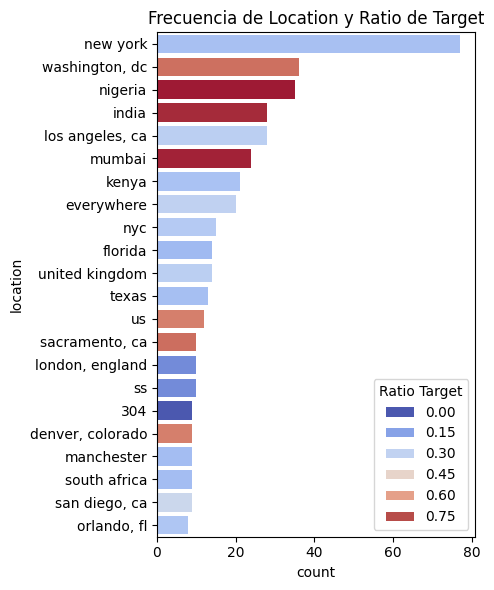

In [63]:
plt.figure(figsize=(5,6))
sns.barplot(
    data=loc_stats.reset_index(),
    y="location",
    x="count",
    hue="ratio",
    palette="coolwarm"
)
plt.title("Frecuencia de Location y Ratio de Target")
plt.legend(title="Ratio Target")
plt.tight_layout()
plt.show()

Con este plot, podemos ver que hay múltiples locaciones que son útiles para predecir el target, aunque no hayamos preprocesado todavía el mismo (lo haremos para el punto 3), ya podemos ver que hay ubicaciones con tendencias a tener targets positivos o negativos. Además, todas estas ubicaciones tienen al menos 8 tweets lo que nos asegura que no se trata de casos aislados o situaciones donde un solo tweet tiene target 1 o 0 y entonces el ratio da 1 o 0.

## Haciendo lo mismo con test.csv

In [64]:
testDf['location'] = (
    testDf['location'].str.strip().str.lower().str.replace(r'[^\w\s,]', '', regex=True)
)

In [65]:
testDf['tweet_length'] = testDf['text'].map(lambda x: len(x))
testDf['words_count'] = testDf['text'].map(lambda x: len(x.split()))
testDf['num_uppercase_letters'] = testDf['text'].str.count(r'[A-Z]')

In [66]:
testDf['num_uppercase_letters'] = testDf['text'].str.count(r'[A-Z]')

In [67]:
testDf['num_uppercase_words'] = testDf['text'].str.findall(r'\b[A-Z]{2,}\b').map(len)

In [68]:
testDf['num_special_chars'] = testDf['text'].str.count(r'[^a-zA-Z0-9\s]')

In [69]:
testDf['num_digits'] = testDf['text'].str.count(r'\d')

In [70]:
testDf['has_hashtag'] = testDf['text'].str.contains(r'#\w+', regex=True, na=False).astype(int)

In [71]:
testDf['has_url'] = testDf['text'].str.contains(r'http[s]?://|www\.', regex=True, na=False).astype(int)

In [72]:
testDf['has_tag'] = testDf['text'].str.contains(r'@\w+', regex=True, na=False).astype(int)

In [73]:
testDf.head(2)

,keyword,location,text,tweet_length,words_count,num_uppercase_letters,num_uppercase_words,num_special_chars,num_digits,has_hashtag,has_url,has_tag
id,,,,,,,,,,,,
0,NaN,NaN,Just happened a terrible car crash,34,6,1,0,0,0,0,0,0
2,NaN,NaN,"Heard about #earthquake is different cities, s...",64,9,1,0,3,0,1,0,0


## Persistencia de datos

In [ ]:
trainDf.head(2)

,keyword,location,text,target,tweet_length,words_count,num_uppercase_letters,num_uppercase_words,num_special_chars,num_digits,has_hashtag,has_url,has_tag
id,,,,,,,,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,10,1,1,0,1,0,0
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,5,0,1,0,0,0,0


In [75]:
trainDf.to_csv("../data/processed/train_modificado.csv", index=True)

In [76]:
testDf.to_csv("../data/processed/test_modificado.csv", index=True)